In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
root_path1 = '/home/lizhuoyuan/MyProjects/LAINR-simplified/src/results/sw/sw_CAE_h32_k5_ReZero_default_none_none'
root_path2 = '/home/lizhuoyuan/MyProjects/LAINR-simplified/src/results/sw/sw_AEflow_b4_k5_ReZero_default_none_none'
root_path3 = '/home/lizhuoyuan/MyProjects/LAINR-simplified/src/results/sw/sw_SINRv11_default_NeuralODE_default_none_none'

In [4]:
import glob

df1 = pd.concat([pd.read_pickle(f) for f in glob.glob(root_path1 + "/*dataframe.pkl")], ignore_index=True)
df2 = pd.concat([pd.read_pickle(f) for f in glob.glob(root_path2 + "/*dataframe.pkl")], ignore_index=True)
df3 = pd.concat([pd.read_pickle(f) for f in glob.glob(root_path3 + "/*dataframe.pkl")], ignore_index=True)

df = pd.concat([df1, df2, df3], ignore_index=True)

In [5]:
df[df == 'CAE_h32_k5'] = 'CAE'
df[df == 'AEflow_b4_k5'] = 'AEflow'
df[df == 'SINRv11_default'] = 'SINR'

df[df == 'ReZero_default'] = 'ReZero'
df[df == 'NeuralODE_default'] = 'NeuralODE'

In [6]:
df['model'] = df['ed_name'] + '+' + df['ld_name']
df[df=='SINR+NeuralODE'] = 'SINR+NeuralODE (LAINR, ours)'
df

,kf_name,step,feature_idx,rmse,ed_name,ld_name,ue_name,sigma_z_b,sigma_m,model
0,EnKF,0,0,0.053713,CAE,ReZero,none_none,0.010,0.1000,CAE+ReZero
1,EnKF,0,1,0.156862,CAE,ReZero,none_none,0.010,0.1000,CAE+ReZero
2,EnKF,1,0,0.053707,CAE,ReZero,none_none,0.010,0.1000,CAE+ReZero
3,EnKF,1,1,0.156137,CAE,ReZero,none_none,0.010,0.1000,CAE+ReZero
4,EnKF,2,0,0.053444,CAE,ReZero,none_none,0.010,0.1000,CAE+ReZero
...,...,...,...,...,...,...,...,...,...,...
125365,ETKF-Q,196,1,0.125468,SINR,NeuralODE,none_none,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"
125366,ETKF-Q,197,0,0.061347,SINR,NeuralODE,none_none,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"
125367,ETKF-Q,197,1,0.125920,SINR,NeuralODE,none_none,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"
125368,ETKF-Q,198,0,0.061489,SINR,NeuralODE,none_none,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"


In [7]:
df.drop(columns=['ed_name', 'ld_name', 'ue_name'], inplace=True)
df

,kf_name,step,feature_idx,rmse,sigma_z_b,sigma_m,model
0,EnKF,0,0,0.053713,0.010,0.1000,CAE+ReZero
1,EnKF,0,1,0.156862,0.010,0.1000,CAE+ReZero
2,EnKF,1,0,0.053707,0.010,0.1000,CAE+ReZero
3,EnKF,1,1,0.156137,0.010,0.1000,CAE+ReZero
4,EnKF,2,0,0.053444,0.010,0.1000,CAE+ReZero
...,...,...,...,...,...,...,...
125365,ETKF-Q,196,1,0.125468,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"
125366,ETKF-Q,197,0,0.061347,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"
125367,ETKF-Q,197,1,0.125920,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"
125368,ETKF-Q,198,0,0.061489,0.001,0.0001,"SINR+NeuralODE (LAINR, ours)"


In [8]:
df_avg_rmse = df.groupby(['model', 'sigma_m', 'sigma_z_b', 'kf_name'],sort=False)['rmse'].mean()
df_avg_rmse

model                         sigma_m  sigma_z_b  kf_name
CAE+ReZero                    0.1000   0.010      EnKF       0.465763
                                                  SEnKF      0.542347
                                                  DEnKF      0.444497
                                                  ETKF       0.517746
                                                  ETKF-Q     0.447482
                                                               ...   
SINR+NeuralODE (LAINR, ours)  0.0001   0.001      EnKF       0.071669
                                                  SEnKF      0.081207
                                                  DEnKF      0.070575
                                                  ETKF       0.070772
                                                  ETKF-Q     0.069803
Name: rmse, Length: 315, dtype: float64

In [9]:
df_avg_rmse = df_avg_rmse.reset_index()
df_avg_rmse

,model,sigma_m,sigma_z_b,kf_name,rmse
0,CAE+ReZero,0.1000,0.010,EnKF,0.465763
1,CAE+ReZero,0.1000,0.010,SEnKF,0.542347
2,CAE+ReZero,0.1000,0.010,DEnKF,0.444497
3,CAE+ReZero,0.1000,0.010,ETKF,0.517746
4,CAE+ReZero,0.1000,0.010,ETKF-Q,0.447482
...,...,...,...,...,...
310,"SINR+NeuralODE (LAINR, ours)",0.0001,0.001,EnKF,0.071669
311,"SINR+NeuralODE (LAINR, ours)",0.0001,0.001,SEnKF,0.081207
312,"SINR+NeuralODE (LAINR, ours)",0.0001,0.001,DEnKF,0.070575
313,"SINR+NeuralODE (LAINR, ours)",0.0001,0.001,ETKF,0.070772


In [10]:
df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE (LAINR, ours)'].sort_values(by='rmse')

,model,sigma_m,sigma_z_b,kf_name,rmse
225,"SINR+NeuralODE (LAINR, ours)",0.003,0.010,EnKF,0.063721
250,"SINR+NeuralODE (LAINR, ours)",0.003,0.003,EnKF,0.063733
275,"SINR+NeuralODE (LAINR, ours)",0.003,0.001,EnKF,0.063734
227,"SINR+NeuralODE (LAINR, ours)",0.003,0.010,DEnKF,0.065405
252,"SINR+NeuralODE (LAINR, ours)",0.003,0.003,DEnKF,0.065425
...,...,...,...,...,...
210,"SINR+NeuralODE (LAINR, ours)",0.100,0.010,EnKF,0.188147
235,"SINR+NeuralODE (LAINR, ours)",0.100,0.003,EnKF,0.188150
212,"SINR+NeuralODE (LAINR, ours)",0.100,0.010,DEnKF,0.203505
262,"SINR+NeuralODE (LAINR, ours)",0.100,0.001,DEnKF,0.203507


CAE+ReZero: 0.4090014882853732, ETKF, sigma_z_b=0.01, sigma_m=0.003
AEflow+ReZero: 0.28169252320974314, EnKF, sigma_z_b=0.001, sigma_m=0.0001
SINR+NeuralODE (LAINR, ours): 0.06372085345637558, EnKF, sigma_z_b=0.01, sigma_m=0.003


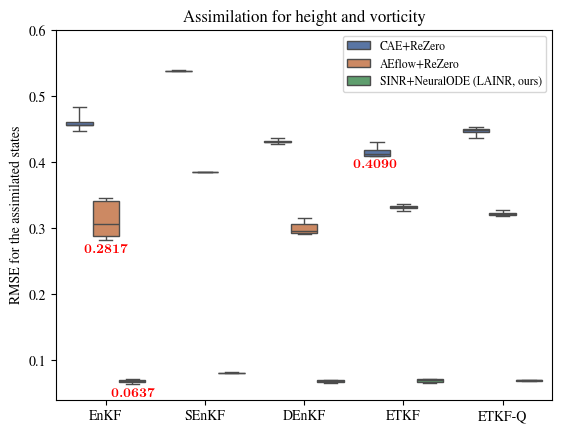

In [13]:
df_avg_rmse = df_avg_rmse[df_avg_rmse['sigma_m'] < 2e-2]
ax = sns.boxplot(df_avg_rmse, x='kf_name', y='rmse',
                 hue='model', palette='deep',
                 whis=(0, 100)
                 )

# ax.set_yscale('log')
ax.set_ylim(4e-2, .6)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
for xtext, model in zip([-2, 0, 2], df_avg_rmse['model'].unique()):
    df_model = df_avg_rmse[df_avg_rmse['model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print(f'{model}: {min_value}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}')
    ax.annotate(r'\textbf{' + f'{min_value:.4f}' + r'}'                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx, min_value),
                xytext=(xtext, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

In [98]:
for column_name in df.columns:
    if column_name in ['ed_name', 'ld_name', 'ue_name', 'rmse']:
        continue
    print(f'{column_name}: {df[column_name].unique()}')

kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
step: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198]
feature_idx: [0 1]
sigma_z_b: [0.01  0.003 0.001]
sigma_m: [0.1    0.03   0.01   0.003  0.001  0.0003 0.0001]
model: ['CAE+ReZero' 'AEf

In [99]:
ax = sns.boxplot(df, x='sigma_m', y='rmse',
                 hue='surrogate model', palette='deep', whis=(0, 100))

ax.set_yscale('log')
ax.set_ylim(5e-2, 1.)
ax.set_xlabel(r'$\sigma^m$', usetex=True)
ax.set_ylabel('RMSE for the assimilated states')

# annotate the minimal value for each model
for xtext, model in zip([-2, 0, 2], df['surrogate model'].unique()):
    df_model = df[df['surrogate model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['sigma_m'].unique()).index(min_row['sigma_m'])
    print(f'{model}: {min_value}')
    ax.annotate(r'\underline{\textbf{'+f'{min_value:.4f}'+r'}}',
                #+f'\n{min_row["kf_name"]} with $\\sigma_z^b={min_row["sigma_z_b"]:.4f}$',
                xy=(x_idx, min_value),
                xytext=(xtext, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

# plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

ValueError: Could not interpret value `surrogate model` for `hue`. An entry with this name does not appear in `data`.

CAE+ReZero: 0.05234653875231743, ETKF-Q, sigma_z_b=0.001, sigma_m=0.1
AEflow+ReZero: 0.021244913339614868, ETKF, sigma_z_b=0.01, sigma_m=0.01
SINR+NeuralODE (LAINR, ours): 0.018551265820860863, DEnKF, sigma_z_b=0.01, sigma_m=0.001


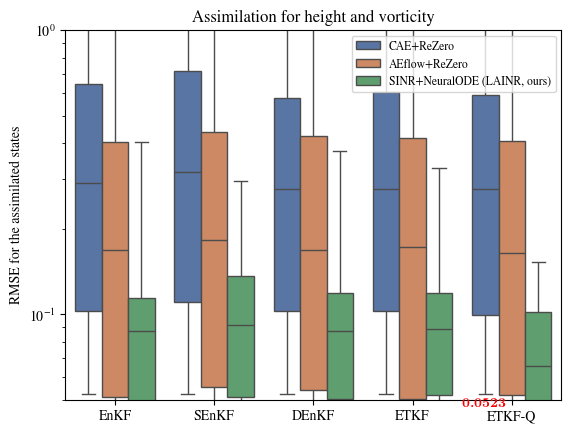

In [ ]:
ax = sns.boxplot(df, x='kf_name', y='rmse',
                 hue='surrogate model', palette='deep', whis=(0, 100))

ax.set_yscale('log')
ax.set_ylim(5e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
for xtext, model in zip([-2, 0, 2], df['surrogate model'].unique()):
    df_model = df[df['surrogate model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print(f'{model}: {min_value}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}')
    ax.annotate(r'\textbf{' + f'{min_value:.4f}' + r'}'
                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx, min_value),
                xytext=(xtext, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

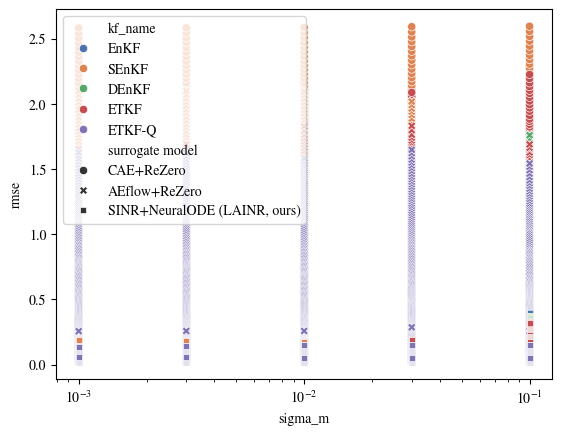

In [ ]:
ax = sns.scatterplot(df, x='sigma_m', y='rmse',
                     hue='kf_name', style='surrogate model', palette='deep')
# ax.set_yscale('log')
ax.set_xscale('log')